In [1]:
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

In [2]:
xl = pd.ExcelFile(r"C:\Users\shyam\Desktop\project\Evaporation.xls")
xl.sheet_names
df = xl.parse("Sheet1")
df.head(100)

,Day,Evp
0,1986-01-01,3.4
1,1986-01-02,3.4
2,1986-01-03,3.9
3,1986-01-04,4.8
4,1986-01-05,4.1
...,...,...
95,1986-04-06,6.7
96,1986-04-07,6.7
97,1986-04-08,6.7
98,1986-04-09,6.8


In [3]:
df.index = np.arange(1, len(df) + 1)
df.columns = ['Date','Evp']
df.head()

,Date,Evp
1,1986-01-01,3.4
2,1986-01-02,3.4
3,1986-01-03,3.9
4,1986-01-04,4.8
5,1986-01-05,4.1


In [4]:
df.describe()

,Evp
count,8401.000000
mean,3.575906
std,1.147815
min,0.500000
25%,2.700000
50%,3.400000
75%,4.300000
max,7.100000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8401 entries, 1 to 8401
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8401 non-null   datetime64[ns]
 1   Evp     8401 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 196.9 KB


In [6]:
df['Month'] = df['Date'].dt.strftime('%b')
df.head()

,Date,Evp,Month
1,1986-01-01,3.4,Jan
2,1986-01-02,3.4,Jan
3,1986-01-03,3.9,Jan
4,1986-01-04,4.8,Jan
5,1986-01-05,4.1,Jan


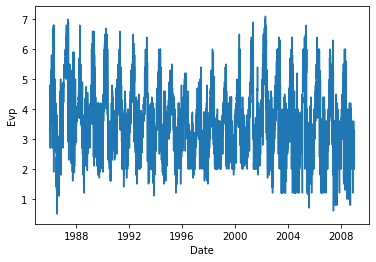

In [7]:
x = df.Date
y = df.Evp
sns.lineplot(x = x, y = y, data = df)
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

In [8]:
df.isnull().sum()

Date     0
Evp      0
Month    0
dtype: int64

In [9]:
# Checking for monthly time scale
df4=df
df4['Month_Year'] = df['Date'].dt.strftime('%y-%b')
df4=df.groupby(df.Month_Year,sort=False)['Evp'].sum()
df4.head(12)

Month_Year
86-Jan    123.9
86-Feb    149.8
86-Mar    172.6
86-Apr    179.7
86-May    132.9
86-Jun    101.1
86-Jul     70.3
86-Aug     70.4
86-Sep     73.1
86-Oct    114.1
86-Nov    101.6
86-Dec    120.6
Name: Evp, dtype: float64

Text(0, 0.5, 'monthly Evaporation')

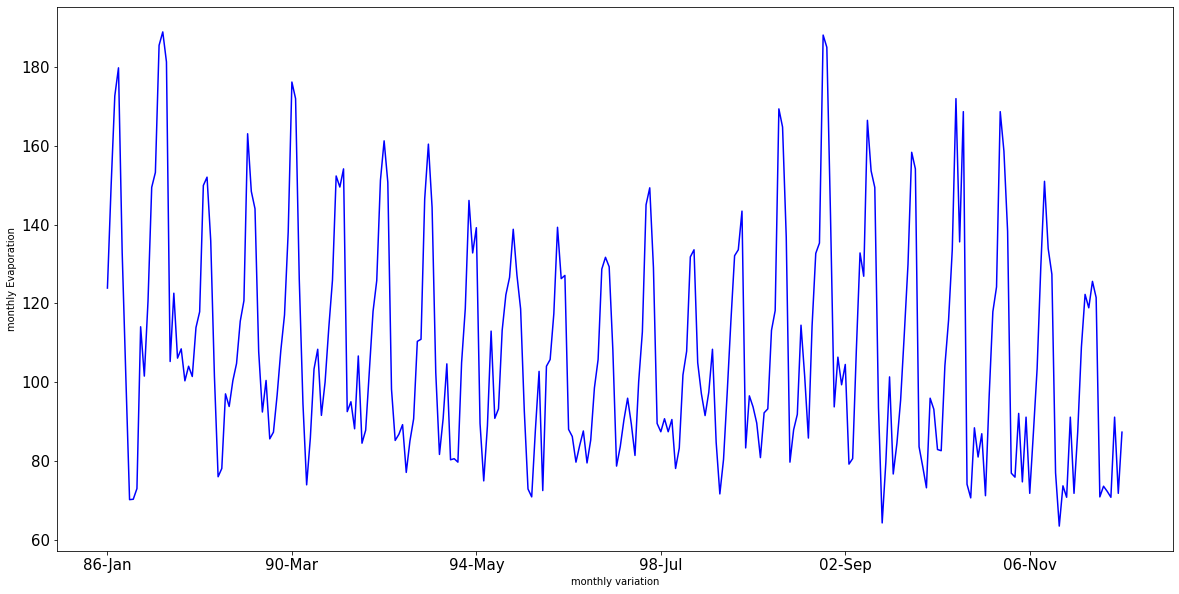

In [10]:
curve = df4.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('monthly variation')
plt.ylabel('monthly Evaporation')

In [11]:
# Checking for Annual time scale
df['Year']=df['Date'].dt.strftime('%y')
df.head()

,Date,Evp,Month,Month_Year,Year
1,1986-01-01,3.4,Jan,86-Jan,86
2,1986-01-02,3.4,Jan,86-Jan,86
3,1986-01-03,3.9,Jan,86-Jan,86
4,1986-01-04,4.8,Jan,86-Jan,86
5,1986-01-05,4.1,Jan,86-Jan,86


In [12]:
df5 = df.groupby(df.Year,sort=False)['Evp'].sum()
df5.head(10)

Year
86    1410.10
87    1606.57
88    1321.75
89    1370.40
90    1387.41
91    1353.75
92    1319.81
93    1293.20
94    1305.85
95    1237.50
Name: Evp, dtype: float64

Text(0, 0.5, 'Annual Evaporation')

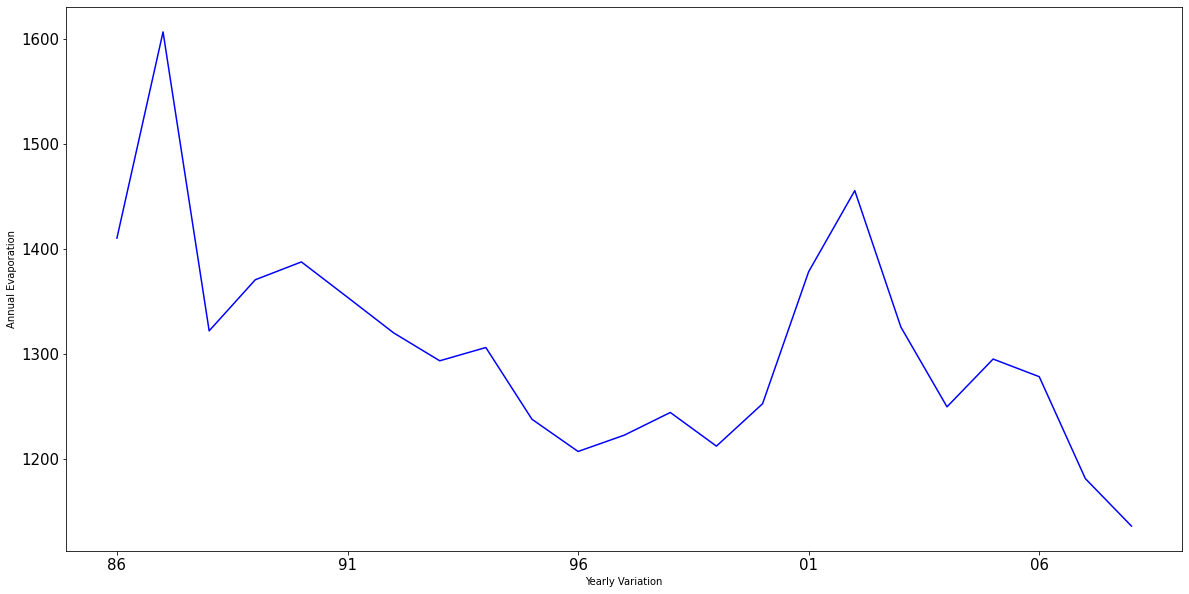

In [13]:
curve = df5.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Yearly Variation')
plt.ylabel('Annual Evaporation')

In [14]:
#Monsoon season consists of June, July, August and Septemeber
def season_categoriser(x):
    if x.month==6 or x.month==7 or x.month==8 or x.month ==9:
        x='Monsoon only'+' '+str(x.year)
    else:
        x='Non-Monsoon'+' '+str(x.year)
    return x

In [15]:
df6=df
df6['Season'] = df['Date'].apply(season_categoriser)
df6.head(180)

,Date,Evp,Month,Month_Year,Year,Season
1,1986-01-01,3.40,Jan,86-Jan,86,Non-Monsoon 1986
2,1986-01-02,3.40,Jan,86-Jan,86,Non-Monsoon 1986
3,1986-01-03,3.90,Jan,86-Jan,86,Non-Monsoon 1986
4,1986-01-04,4.80,Jan,86-Jan,86,Non-Monsoon 1986
5,1986-01-05,4.10,Jan,86-Jan,86,Non-Monsoon 1986
...,...,...,...,...,...,...
176,1986-06-25,3.05,Jun,86-Jun,86,Monsoon only 1986
177,1986-06-26,3.45,Jun,86-Jun,86,Monsoon only 1986
178,1986-06-27,3.60,Jun,86-Jun,86,Monsoon only 1986
179,1986-06-28,3.75,Jun,86-Jun,86,Monsoon only 1986


In [16]:
df7 = df6[df6['Season'].str.contains('Non-Monsoon')]
df8 = df6[df6['Season'].str.contains('Monsoon only')]

In [17]:
df7 = df7.groupby(df7.Season,sort=False)['Evp'].sum()
df7.head(10)

Season
Non-Monsoon 1986    1095.20
Non-Monsoon 1987    1164.02
Non-Monsoon 1988     968.75
Non-Monsoon 1989     983.90
Non-Monsoon 1990    1029.45
Non-Monsoon 1991     971.10
Non-Monsoon 1992     960.06
Non-Monsoon 1993     913.40
Non-Monsoon 1994     939.20
Non-Monsoon 1995     912.90
Name: Evp, dtype: float64

In [18]:
df8 = df8.groupby(df8.Season,sort=False)['Evp'].sum()
df8.head(10)

Season
Monsoon only 1986    314.90
Monsoon only 1987    442.55
Monsoon only 1988    353.00
Monsoon only 1989    386.50
Monsoon only 1990    357.96
Monsoon only 1991    382.65
Monsoon only 1992    359.75
Monsoon only 1993    379.80
Monsoon only 1994    366.65
Monsoon only 1995    324.60
Name: Evp, dtype: float64

Text(0, 0.5, 'Seasonal Evaporation')

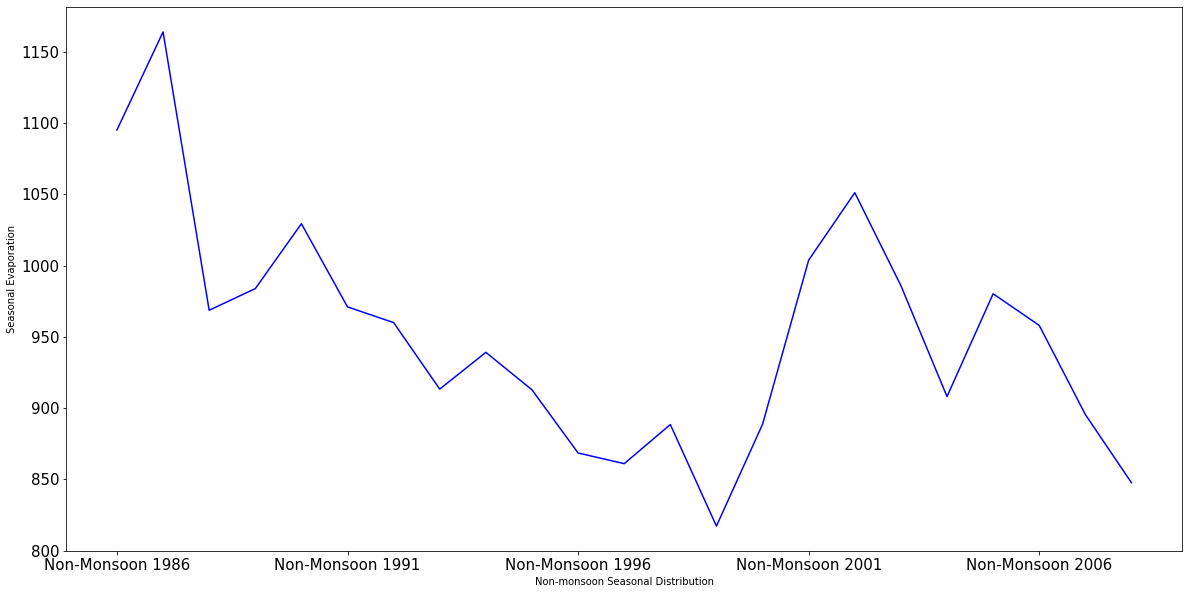

In [19]:
curve = df7.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Non-monsoon Seasonal Distribution')
plt.ylabel('Seasonal Evaporation')

Text(0, 0.5, 'Seasonal Evaporation')

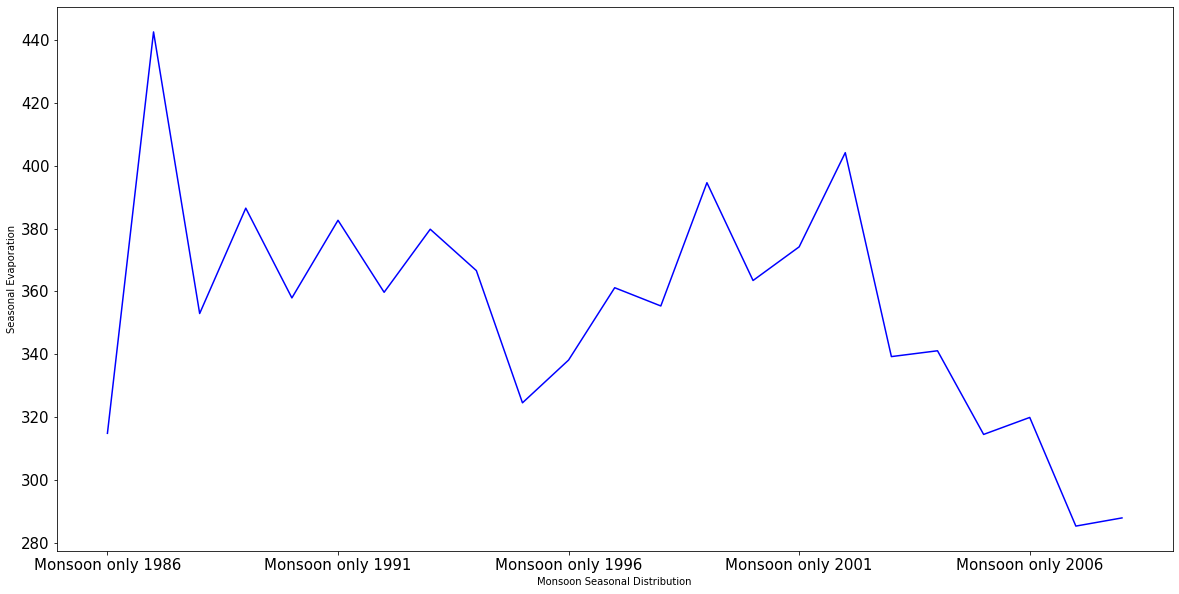

In [20]:
curve = df8.plot(color='blue', fontsize=15)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel('Monsoon Seasonal Distribution')
plt.ylabel('Seasonal Evaporation')

In [21]:
#Mann-Kendall test for trend analysis
import pip
pip.main(['install','pymannkendall'])
import pymannkendall as mk

stat1= mk.original_test(df['Evp'])
print(stat1)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Mann_Kendall_Test(trend='decreasing', h=True, p=0.0, z=-14.00669539125696, Tau=-0.10186035109199018, s=-3594061.0, var_s=65841433549.0, slope=-7.29527630859019e-05, intercept=3.7064016049607877)


In [22]:
df4= pd.DataFrame(df4)
stat2= mk.original_test(df4['Evp'])
print(stat2)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.00035441975909233925, z=-3.5718859506365677, Tau=-0.1442687747035573, s=-5475.0, var_s=2348629.0, slope=-0.07435053981106615, intercept=112.4131992240216)


In [23]:
df5 = pd.DataFrame(df5)
stat3 = mk.original_test(df5['Evp'])
print(stat3)

Mann_Kendall_Test(trend='decreasing', h=True, p=0.005118048858841595, z=-2.7995083768092495, Tau=-0.42292490118577075, s=-107.0, var_s=1433.6666666666667, slope=-8.933333333333318, intercept=1393.1166666666663)


In [24]:
df7 = pd.DataFrame(df7)
stat4 = mk.seasonal_test(df7['Evp'])
print(stat4)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0.0, Tau=-0.09090909090909091, s=-1.0, var_s=11.0, slope=-17.350000000000023, intercept=974.0041666666667)


In [25]:
df8 = pd.DataFrame(df8)
stat5 = mk.seasonal_test(df7['Evp'])
print(stat5)

Seasonal_Mann_Kendall_Test(trend='no trend', h=False, p=1.0, z=0.0, Tau=-0.09090909090909091, s=-1.0, var_s=11.0, slope=-17.350000000000023, intercept=974.0041666666667)


In [26]:
#Sen-slope estimator for trend analysis
stat6= mk.sens_slope(df['Evp'])
print(stat6)

Sens_Slope_Test(slope=-7.29527630859019e-05, intercept=3.7064016049607877)


In [27]:
stat7= mk.sens_slope(df4['Evp'])
print(stat7)

Sens_Slope_Test(slope=-0.07435053981106615, intercept=112.4131992240216)


In [28]:
stat8= mk.sens_slope(df5['Evp'])
print(stat8)

Sens_Slope_Test(slope=-8.933333333333318, intercept=1393.1166666666663)


In [29]:
stat9= mk.sens_slope(df7['Evp'])
print(stat9)

Sens_Slope_Test(slope=-6.535714285714286, intercept=1029.9928571428572)


In [30]:
stat10= mk.sens_slope(df8['Evp'])
print(stat10)

Sens_Slope_Test(slope=-3.0233333333333348, intercept=391.21666666666664)


In [31]:
# Change point analysis using Petit's test
import pip
pip.main(['install','pyhomogeneity'])
import pyhomogeneity as hg
stat11 = hg.pettitt_test(df['Evp'])
df['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_daily.xls', index=False)
print(stat11)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
C:\Users\shyam\AppData\Local\Temp/ipykernel_15048/4026038733.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_daily.xls', index=False)


Pettitt_Test(h=True, cp=2346, p=0.0, U=3140546.0, avg=mean(mu1=3.9078346121057113, mu2=3.4473014037985137))


In [32]:
stat12 = hg.pettitt_test(df4['Evp'])
df4['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_month.xls', index=False)
print(stat12)

Pettitt_Test(h=True, cp=77, p=0.0069, U=4355.0, avg=mean(mu1=118.92051948051949, mu2=104.94628140703519))


C:\Users\shyam\AppData\Local\Temp/ipykernel_15048/3339049769.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df4['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_month.xls', index=False)


In [33]:
stat13 = hg.pettitt_test(df5['Evp'])
df5['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_yearly.xls', index=False)
print(stat13)

Pettitt_Test(h=True, cp=7, p=0.01825, U=88.0, avg=mean(mu1=1395.6842857142856, mu2=1266.9625))


C:\Users\shyam\AppData\Local\Temp/ipykernel_15048/2997793304.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df5['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_yearly.xls', index=False)


In [34]:
stat14 = hg.pettitt_test(df7['Evp'])
df7['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_non-monsoon.xls', index=False)
print(stat14)

Pettitt_Test(h=True, cp=7, p=0.04125, U=80.0, avg=mean(mu1=1024.6399999999999, mu2=920.046875))


C:\Users\shyam\AppData\Local\Temp/ipykernel_15048/2907606869.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df7['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_non-monsoon.xls', index=False)


In [35]:
stat15 = hg.pettitt_test(df8['Evp'])
df8['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_monsoon.xls', index=False)
print(stat15)

Pettitt_Test(h=True, cp=17, p=0.0182, U=88.0, avg=mean(mu1=368.21235294117645, mu2=314.72499999999997))


C:\Users\shyam\AppData\Local\Temp/ipykernel_15048/3690798878.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df8['Evp'].to_excel(r'C:\Users\shyam\Desktop\Aggregate\Evaporation_monsoon.xls', index=False)
